This notebook is the main testing notebook for the 2D GPE simulator. It runs a variety of tests to demonstrate the functionality of the simulator. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from gpetimeev2 import GPETimeEv as gpe
from gpetimeev import GPETimeEv as gpe2

In [6]:
import matplotlib.animation as animation 

Try testing the energy in 1 dimension

In [2]:
g_1d = gpe(dim = 1, intoff = True) 

Text(0.5, 1.0, '1D Energy Plot during Real Time Propagation')

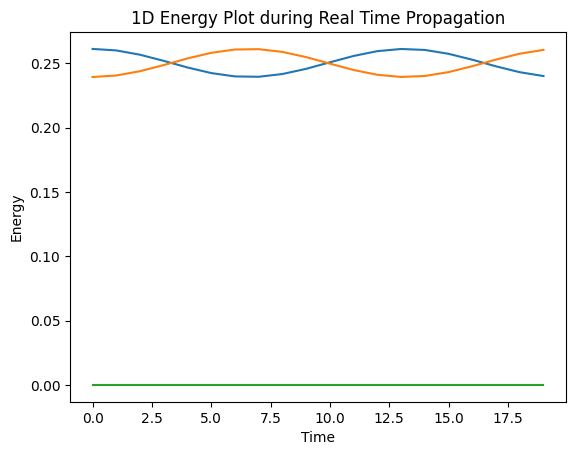

In [3]:
Ep_arr = np.array(g_1d.Ep_arr1d)
Ek_arr = np.array(g_1d.Ek_arr1d)
Ei_arr = np.array(g_1d.Ei_arr1d)

plt.figure() 
plt.plot(Ep_arr/g_1d.Natoms, label = 'Potential') 
plt.plot(Ek_arr/g_1d.Natoms, label = 'Kinetic') 
plt.plot(Ei_arr/g_1d.Natoms, label = 'Interaction') 
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("1D Energy Plot during Real Time Propagation")

(511999.9999999998+0j)
512000


c:\Users\TQC User\Desktop\BECs\gpetimeev2.py:379: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  theAnim = animation.FuncAnimation(fig, animate, blit=True, repeat=True) # Note the needed `theAnim` variable. Without it, the garbarge collector would destroy the animation before it is over


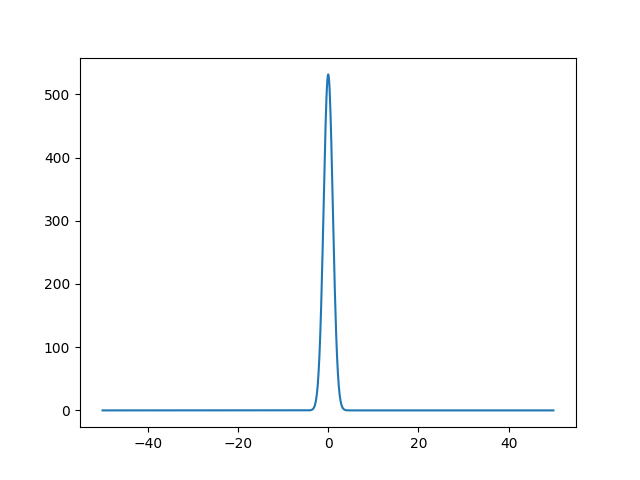

In [11]:
%matplotlib widget
print(np.sum(np.conj(g_1d.dynpsi) * g_1d.dynpsi)*g_1d.dx )
print(g_1d.Natoms)
g_1d.animatepsi() 

In [12]:
print(np.shape(g_1d.snapshots))

(21, 1024)


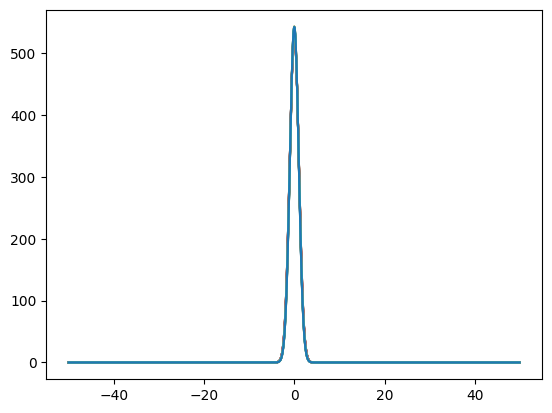

In [4]:
plt.figure() 
for i in range(len(g_1d.snapshots)): 
   plt.plot(g_1d.xi[0], np.abs(g_1d.snapshots[i]))
plt.show()  

C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


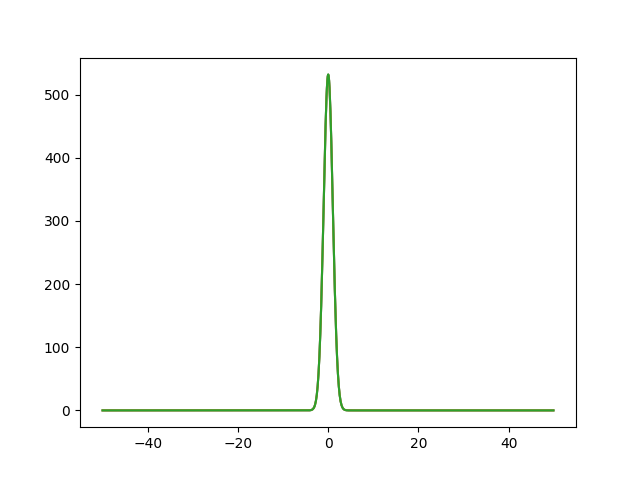

In [21]:
plt.figure() 
plt.plot(g_1d.xi[0], g_1d.snapshots[0]) 
plt.plot(g_1d.xi[0], g_1d.snapshots[1]) 
plt.plot(g_1d.xi[0], np.abs(g_1d.snapshots[15]) )

## GPE Simulator in 2D

First demonstrate that the code runs in the way that we expect for propagation in a harmonic oscillator potential in both imaginary and real time. The frequency $\omega = 1$. 

In [3]:
g = gpe(dim = 2)

In [29]:
print(g.dt)
print(g.npoints)

0.00095367431640625
1024


Now, demonstrate that propagating the wavefunction in a harmonic potential in imaginary then real time, the wavefunction satisfies conservation of energy and the virial theorem. 

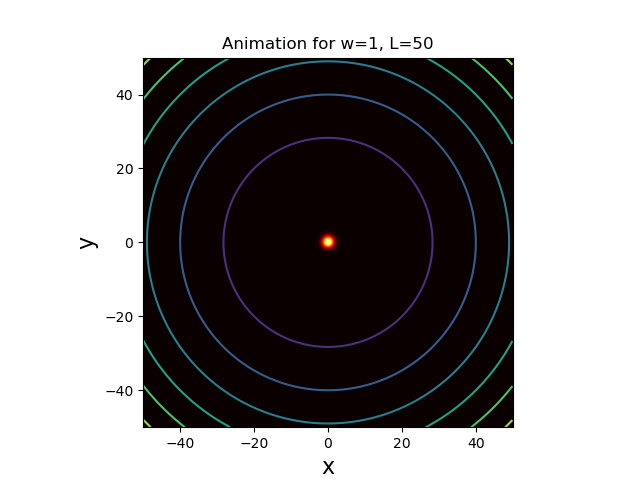

In [7]:
%matplotlib widget
fig, ax = plt.subplots() 
data = plt.imshow(np.abs(g.snapshots[0]), extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2],cmap = plt.cm.hot, origin = 'lower') 
plt.xlabel("x", fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.contour(g.xi[0], g.xi[1], g.Vs)
plt.title(f'Animation for w={g.w}, L={g.L}')

def animate(i): 
    data.set_data(np.abs(g.snapshots[i]))
    return [data]
anim = animation.FuncAnimation(fig, animate, frames = len(g.snapshots))

plt.show()

In [8]:
Ep_arr = np.array(g.Ep_arr) /g.Natoms
Ek_arr = np.array(g.Ek_arr) /g.Natoms
Ei_arr = np.array(g.Ei_arr) /g.Natoms

In [10]:
print(Ep_arr) 
print(Ek_arr) 
print(Ei_arr) 

[0.5576281 -9.43023656e-23j 0.55557922-3.41357716e-20j
 0.54970996+2.63402967e-19j 0.54132954+9.12267613e-20j
 0.53230749+3.55791608e-19j 0.52465662-1.44528178e-19j
 0.52008395-1.15208200e-19j 0.51960989-1.48330883e-19j
 0.52334049-2.89995448e-19j 0.53044371+8.88549586e-19j
 0.53933501-5.06343212e-20j 0.5480308 +6.80968745e-20j
 0.55459095+7.98648131e-19j 0.55755174+5.24799873e-19j
 0.5562524 +3.00212553e-19j 0.55098258-2.89996744e-20j
 0.54291778-3.74558051e-19j 0.53385709+8.88367092e-19j
 0.52582192+4.97622508e-19j 0.52060502-5.02781461e-19j]
[0.44867037+2.14946506e-24j 0.45047758-8.81698027e-20j
 0.45562134+8.69972197e-20j 0.46291285+1.18347135e-19j
 0.47069747-6.53528287e-20j 0.47724548+3.02228880e-19j
 0.4811322 -1.39956619e-19j 0.48152621-2.43239027e-19j
 0.47834433+2.20897689e-19j 0.47226607+2.06303058e-19j
 0.4646083 +2.43235587e-19j 0.45706336-2.41974971e-19j
 0.45133372-1.64505973e-19j 0.44873784-9.88014811e-20j
 0.44988369+1.68308548e-19j 0.45450621+1.08831865e-19j
 0.461534

/Users/elliesuit/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


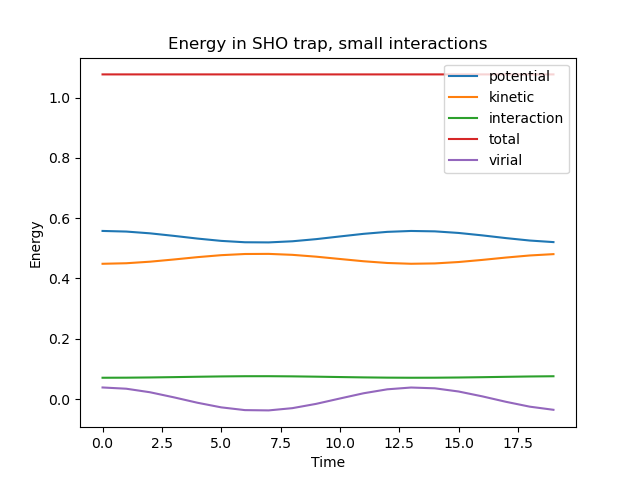

In [28]:
plt.figure() 
plt.plot(Ep_arr, label = "potential") 
plt.plot(Ek_arr, label = 'kinetic') 
plt.plot(Ei_arr, label = "interaction") 

plt.plot(Ep_arr + Ek_arr + Ei_arr, label = "total") 
plt.plot(Ep_arr - Ek_arr - Ei_arr, label = 'virial')
plt.ylabel("Energy")
plt.xlabel("Time")
plt.title("Energy in SHO trap, small interactions")
plt.legend() 

In [11]:
print(np.mean(Ep_arr - Ek_arr - Ei_arr))

(0.0015478959219703298-6.968934365880775e-21j)


Test to make sure the KE and PE are correct upon turning off interactions

In [2]:
g_noint = gpe(dim = 2, intoff = True)

In [3]:
Ep_arr2 = np.array(g_noint.Ep_arr)/g_noint.Natoms 
Ek_arr2 = np.array(g_noint.Ek_arr)/g_noint.Natoms 
Ei_arr2 = np.array(g_noint.Ei_arr)/g_noint.Natoms 


/Users/elliesuit/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Energy ')

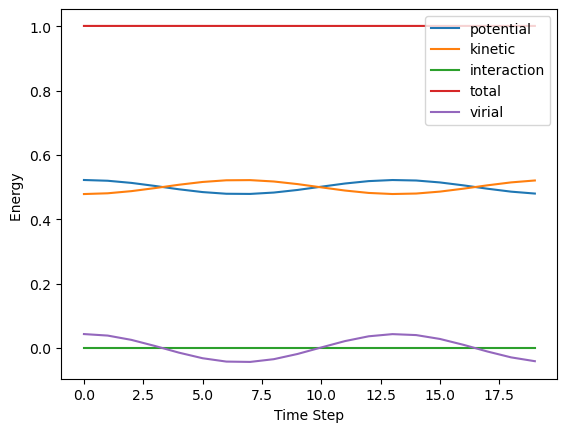

In [6]:
plt.plot(Ep_arr2, label = "potential") 
plt.plot(Ek_arr2, label = 'kinetic') 
plt.plot(Ei_arr2, label = "interaction") 

plt.plot(Ep_arr2 + Ek_arr2 + Ei_arr2, label = "total") 
plt.plot(Ep_arr2 - Ek_arr2 - Ei_arr2, label = 'virial')
plt.legend()  
plt.xlabel("Time Step")
plt.ylabel("Energy ")

In [5]:
print(Ep_arr2)
print(Ek_arr2)

[0.52230338+5.20564341e-23j 0.51996379-1.16418432e-20j
 0.51327658-1.15456284e-20j 0.50373365-1.88647952e-20j
 0.49346402-3.64996985e-20j 0.48475881+5.35094243e-20j
 0.47956013+2.21370890e-21j 0.47902782+1.63425730e-21j
 0.48328061+8.52377672e-21j 0.49136973+1.79410963e-20j
 0.5014905 -6.97685540e-21j 0.51138501-1.73931532e-20j
 0.5188458 +9.90790687e-21j 0.5222084 +7.71338619e-22j
 0.5207226 +7.32351254e-21j 0.5147199 -5.32469851e-21j
 0.50553948-6.85121207e-21j 0.49522947+8.81401296e-21j
 0.48609002+1.24222229e-20j 0.48016011-7.15632481e-21j]
[0.47864903-1.18345262e-23j 0.48099819-6.53871248e-21j
 0.48769288-1.18735524e-20j 0.49723952+1.33018870e-20j
 0.50750828+4.31709432e-21j 0.51620822+1.37445944e-20j
 0.5213984 -5.22502218e-22j 0.5219209 -1.87061295e-21j
 0.51765915-1.43750028e-20j 0.50956394-1.58101272e-20j
 0.4994413 -1.03740996e-20j 0.48954956+1.29025911e-20j
 0.48209555-2.08673713e-21j 0.47874225-1.62448027e-21j
 0.48023778-2.27401699e-21j 0.48624847+2.30525496e-20j
 0.495433

## Test it out in a box potential

In [13]:
from gpetimeev_orig import GPETimeEv as gpe_box

In [14]:
g_box = gpe_box(dim = 2) 

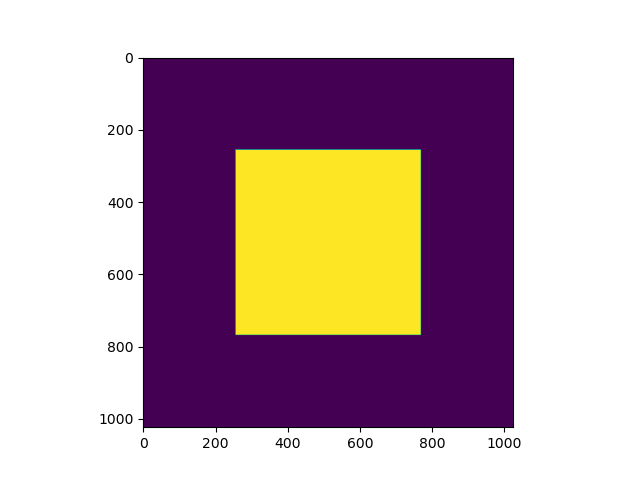

In [20]:
plt.figure() 
plt.imshow(np.real(g_box.psi_init))

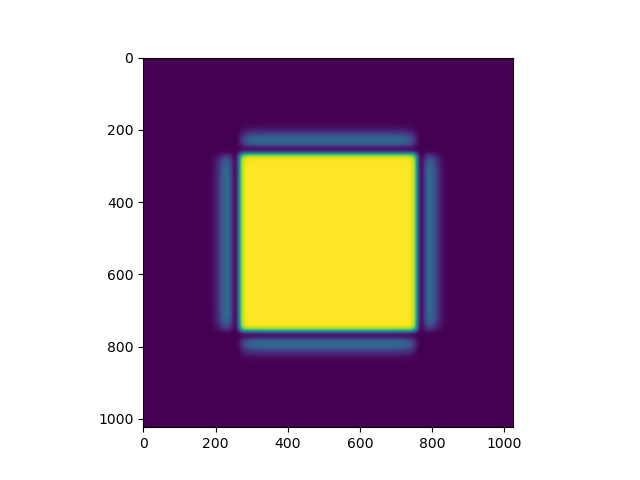

In [21]:
plt.figure() 
plt.imshow(np.real(g_box.psi))

/Users/elliesuit/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


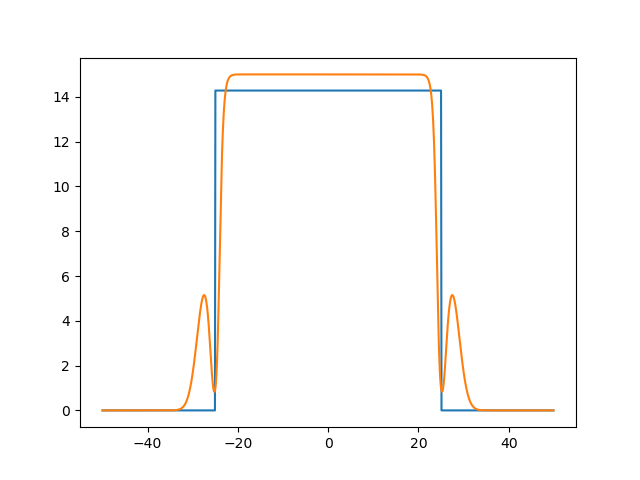

In [26]:
plt.figure() 
plt.plot(g_box.xi[0][0], g_box.psi_init[512])
plt.plot(g_box.xi[0][0], g_box.psi[512])

TypeError: bad operand type for abs(): 'NoneType'

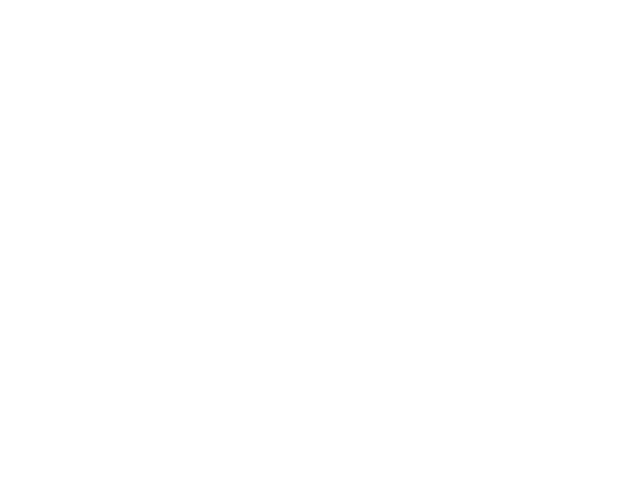

In [22]:
plt.figure() 
plt.imshow(np.abs(g_box.dynpsi)) 